Saving tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8.csv to tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8 (11).csv


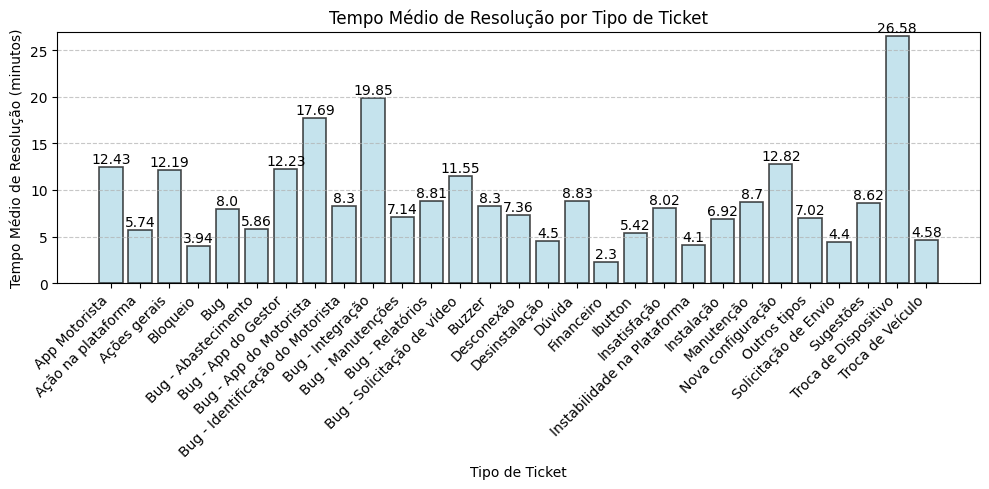

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Faz o upload do arquivo
uploaded = files.upload()

# Ler os dados dos tickets
tickets = pd.read_csv("/content/tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8.csv")

# Renomear a coluna "tipo_do_ticket" para "Ticket type name"
tickets.columns = tickets.columns.str.replace("tipo_do_ticket", "Ticket type name")

# Definir um limite de tempo para o gráfico
limite_tempo = 24 * 3600

# Filtrar os dados usando a nova coluna "Ticket type name"
tickets_atrasados = tickets[tickets["Time to resolve (seconds)"] > limite_tempo]

# Criar um novo DataFrame com o tempo médio de resolução por tipo de ticket (em minutos)
tempo_medio_resolucao = tickets_atrasados.groupby("Ticket type name")["Time to resolve (seconds)"].mean() / 60 / 1000

# Criar o gráfico com rótulos do eixo y em milhares de minutos
plt.figure(figsize=(10, 5))
bars = plt.bar(tempo_medio_resolucao.index, tempo_medio_resolucao, color='lightblue', edgecolor='black', linewidth=1.2, alpha=0.7)

# Adicionar rótulos nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

# Adicionar título e rótulos aos eixos
plt.title("Tempo Médio de Resolução por Tipo de Ticket")
plt.xlabel("Tipo de Ticket")
plt.ylabel("Tempo Médio de Resolução (minutos)")

# Definir os limites do eixo y
plt.ylim(bottom=0, top=int(tempo_medio_resolucao.max()) + 1)

# Personalizar o estilo do grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha="right")  # Ajusta a orientação dos rótulos do eixo x
plt.tight_layout()  # Ajusta o layout para evitar cortar rótulos

plt.show()


In [10]:
pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40703 sha256=28b7c7bb8394ba2b51a65a1b38f7cc17149f0d2b40cc4248b79c37b73e76d91d
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF
from google.colab import files
from io import BytesIO

# Faz o upload do arquivo
uploaded = files.upload()

# Ler os dados dos tickets
tickets = pd.read_csv("/content/tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8.csv")

# Criar um gráfico
plt.figure(figsize=(10, 5))
plt.bar(tempo_medio_resolucao.index, tempo_medio_resolucao, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel("Tipo de ticket")
plt.ylabel("Tempo médio de resolução (milhares de minutos)")
plt.title("Tempo Médio de Resolução por Tipo de Ticket")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Salvar o gráfico em um arquivo temporário
temp_image_path = "/content/temp_chart.png"
plt.savefig(temp_image_path, format='png')
plt.close()

# Criar um PDF
pdf = FPDF()
pdf.add_page()

# Adicionar informações do DataFrame
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Dados do DataFrame:", ln=True, align='L')
pdf.multi_cell(0, 10, txt=str(tickets.head()), align='L')

# Adicionar o gráfico do arquivo temporário
pdf.ln(10)  # Adicionar espaço
pdf.image(temp_image_path, x=10, y=pdf.get_y(), w=190)

# Salvar o PDF
pdf_output_path = "/content/relatorio.pdf"
pdf.output(pdf_output_path)
pdf_output_path = "/content/relatorio.pdf"
pdf.output(pdf_output_path)

# Baixar o PDF
files.download(pdf_output_path)

output



# Baixar o PDF
files.download(pdf_output_path)


Saving tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8.csv to tickets-data-export.uk31kig3.07cd4250-faa1-4333-8225-daae4c2d2eb8 (10).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>